In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [259]:
def read_config(config_filename):
    config = {}
    with open(config_filename, 'r') as f:
        for line in f:

            l = [el.strip() for el in line.strip().split('=')]
            if 'fn' in l[0]:  
                config[l[0]] = l[1]

            else:
                config[l[0]] = float(l[1])

    config['n_iter'] = int(config['n_iter'])
    config['np'] = int(config['np'])
    
    return config

def read_data(data_filename):
    raw_data = np.fromfile(data_filename, dtype=float)
    data = np.stack(np.split(np.stack(np.hsplit(raw_data.reshape(-1,4),4)).T[0].T, config['n_iter'], axis=1)) # lol magic
    return data



In [260]:
config_filename = '../sims/sod_shock_tube/sod_shock_tube.config'
config = read_config(config_filename)

data_filename = '../sims/sod_shock_tube/sod_shock_tube.dat'
data = read_data(data_filename)

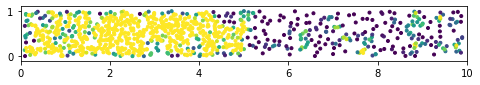

In [304]:
fig,ax = plt.subplots(figsize=(8,1))

xs, ys, zs, density = data[0]
ax.scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.001, vmax=0.002)

ax.axis('equal')
ax.set_xlim(0,10)
ax.set_ylim(0,1)
plt.show()

In [333]:
xs, ys, zs, density = data[0]

phys_x = 10
phys_y = 1

scaling_x = 1
scaling_y = 1

buffer_x = phys_x*0.005
buffer_y = phys_y*0.005

grid_x = phys_x*scaling_x
grid_y = phys_y*scaling_y

data_grid = np.zeros((grid_y, grid_x))
for x,y,d in zip(xs, ys, density):
    
    if not (0 < x < phys_x):
        x = np.trunc(x)-buffer_x
    if not (0 < y < phys_y):
        y = np.trunc(y)-buffer_y
        
    i,j = int(x*scaling_x), int(y*scaling_y)
    data_grid[j,i] += 1
        

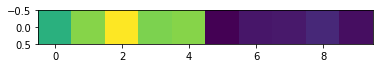

In [334]:
fig,ax = plt.subplots()

ax.imshow(data_grid)
plt.show()

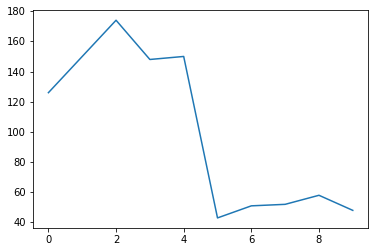

In [335]:
fig,ax = plt.subplots()

ax.plot(data_grid[0])

plt.show()

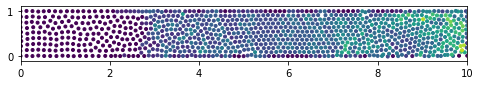

In [264]:
fig,ax = plt.subplots(figsize=(8,1))

xs, ys, zs, density =  data[-1]
ax.scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.001, vmax=0.002)

ax.axis('equal')
ax.set_xlim(0,10)
ax.set_ylim(0,1)

plt.show()

In [265]:
counter = 0
for i in range(len(data)):
    if i%5==0:
        xs, ys, zs, density = data[i]
        fig,ax = plt.subplots(figsize=(8,1))
        ax.scatter(xs, ys, c=density, cmap='viridis', marker='.', vmin=0.001, vmax=0.002)
        ax.axis('equal')
        ax.set_xlim(0,10)
        ax.set_ylim(0,1)
        plt.savefig('./frames/{:05}.png'.format(counter), bbox_inches='tight')
        plt.close()
        counter+=1
